In [1]:
import numpy as np
import os
import cv2
import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D
from keras import optimizers
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

/Users/quansun/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# define a function to transform color images into grayscale
def make_grayscale(img):
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return gray_img

# define a function to sobel filter images via x axis
# you can change the filter
def filter_sobelx(img):
    sobelx = cv2.Sobel(img,cv2.CV_32F,1,0,ksize=3)
#   sobely = cv2.Sobel(img,cv2.CV_32F,0,1,ksize=3)
    return sobelx

# define a function to transform pixel values into [0,1]
def normalizeImage(img):
    img = img/255.0
    return img

# define a function to perform MinMaxScaler
def MinMaxScaler(img):
    img = (img-np.min(img))/(np.max(img)-np.min(img))
    return img

In [7]:
# get paths to the training images
data_path = 'data'

folderpaths = [os.path.join(data_path,path) for path in os.listdir(data_path) if os.path.isdir(os.path.join(data_path,path))]
imagepaths = []

for folderpath in folderpaths:
    temp = [os.path.join(folderpath,filename) for filename in os.listdir(folderpath) if filename.endswith('.jpg')]
    imagepaths += temp

In [10]:
# load and process training data
images = []
grayimages = []
filteredimages = []

np.random.shuffle(imagepaths)
for imagepath in imagepaths:
    img = cv2.imread(imagepath).astype(np.float32)
    img = normalizeImage(img)
    gray_img = make_grayscale(img)
    filtered_img = filter_sobelx(gray_img)
    images.append(img)
    grayimages.append(gray_img)
    filteredimages.append(filtered_img)

In [13]:
images = np.array(images).astype('float32')
grayimages = np.array(grayimages).astype('float32')
filteredimages = np.array(filteredimages).astype('float32')

In [17]:
print('The shape of images:', images.shape)
print('The shape of grayimages:', grayimages.shape)
print('The shape of filteredimages:', filteredimages.shape)

The shape of images: (2688, 256, 256, 3)
The shape of grayimages: (2688, 256, 256)
The shape of filteredimages: (2688, 256, 256)


In [18]:
# we need change the shape of grayimages and filterediamges
grayimages = grayimages.reshape(-1,256,256,1)
filteredimages = filteredimages.reshape(-1,256,256,1)

In [20]:
margin = np.ones(shape=(256,10,3))
combined_image = np.hstack((img,margin,np.dstack((gray_img,)*3),margin,np.dstack((normalizeImage(filtered_img),)*3)))

cv2.imwrite('sobelx.png',(255*combined_image).astype(np.uint8))

True

In [22]:
model = Sequential()
model.add(Conv2D(1,(3,3),padding='same',input_shape=(256,256,1)))
model.compile(optimizer=optimizers.SGD(lr=1e-2,decay=1e-6,momentum=0.9,nesterov=True),loss='mean_squared_error',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 256, 256, 1)       10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [23]:
epochs = 100
loss = []
val_loss = []
weights = []

for epoch in range(epochs):
    temp = model.fit(grayimages,filteredimages,
                    batch_size=4,epochs=1,validation_split=0.2)
    loss.append(temp.history['loss'][0])
    val_loss.append(temp.history['val_loss'][0])
    weights.append(model.layers[0].get_weights()[0].squeeze())

Train on 2150 samples, validate on 538 samples
Epoch 1/1
2150/2150 [==============================] - 9s 4ms/step - loss: 0.0540 - acc: 0.0489 - val_loss: 0.0273 - val_acc: 0.0501
Train on 2150 samples, validate on 538 samples
Epoch 1/1
2150/2150 [==============================] - 8s 4ms/step - loss: 0.0253 - acc: 0.0475 - val_loss: 0.0240 - val_acc: 0.0499
Train on 2150 samples, validate on 538 samples
Epoch 1/1
2150/2150 [==============================] - 9s 4ms/step - loss: 0.0242 - acc: 0.0474 - val_loss: 0.0237 - val_acc: 0.0498
Train on 2150 samples, validate on 538 samples
Epoch 1/1
2150/2150 [==============================] - 9s 4ms/step - loss: 0.0240 - acc: 0.0474 - val_loss: 0.0236 - val_acc: 0.0498
Train on 2150 samples, validate on 538 samples
Epoch 1/1
2150/2150 [==============================] - 9s 4ms/step - loss: 0.0239 - acc: 0.0474 - val_loss: 0.0235 - val_acc: 0.0498
Train on 2150 samples, validate on 538 samples
Epoch 1/1
2150/2150 [==============================] 

2150/2150 [==============================] - 10s 5ms/step - loss: 0.0237 - acc: 0.0474 - val_loss: 0.0234 - val_acc: 0.0499
Train on 2150 samples, validate on 538 samples
Epoch 1/1
2150/2150 [==============================] - 10s 4ms/step - loss: 0.0237 - acc: 0.0474 - val_loss: 0.0234 - val_acc: 0.0498
Train on 2150 samples, validate on 538 samples
Epoch 1/1
2150/2150 [==============================] - 10s 5ms/step - loss: 0.0237 - acc: 0.0474 - val_loss: 0.0234 - val_acc: 0.0498
Train on 2150 samples, validate on 538 samples
Epoch 1/1
2150/2150 [==============================] - 9s 4ms/step - loss: 0.0237 - acc: 0.0474 - val_loss: 0.0234 - val_acc: 0.0499
Train on 2150 samples, validate on 538 samples
Epoch 1/1
2150/2150 [==============================] - 9s 4ms/step - loss: 0.0237 - acc: 0.0474 - val_loss: 0.0234 - val_acc: 0.0499
Train on 2150 samples, validate on 538 samples
Epoch 1/1
2150/2150 [==============================] - 9s 4ms/step - loss: 0.0237 - acc: 0.0474 - val_loss:

2150/2150 [==============================] - 9s 4ms/step - loss: 0.0237 - acc: 0.0474 - val_loss: 0.0234 - val_acc: 0.0499
Train on 2150 samples, validate on 538 samples
Epoch 1/1
2150/2150 [==============================] - 10s 4ms/step - loss: 0.0237 - acc: 0.0474 - val_loss: 0.0234 - val_acc: 0.0499
Train on 2150 samples, validate on 538 samples
Epoch 1/1
2150/2150 [==============================] - 9s 4ms/step - loss: 0.0237 - acc: 0.0474 - val_loss: 0.0234 - val_acc: 0.0499
Train on 2150 samples, validate on 538 samples
Epoch 1/1
2150/2150 [==============================] - 9s 4ms/step - loss: 0.0237 - acc: 0.0474 - val_loss: 0.0234 - val_acc: 0.0499
Train on 2150 samples, validate on 538 samples
Epoch 1/1
2150/2150 [==============================] - 9s 4ms/step - loss: 0.0237 - acc: 0.0474 - val_loss: 0.0234 - val_acc: 0.0499
Train on 2150 samples, validate on 538 samples
Epoch 1/1
2150/2150 [==============================] - 9s 4ms/step - loss: 0.0237 - acc: 0.0474 - val_loss: 0

In [24]:
# save the model
model.save('cnn_model_sobelx.h5')

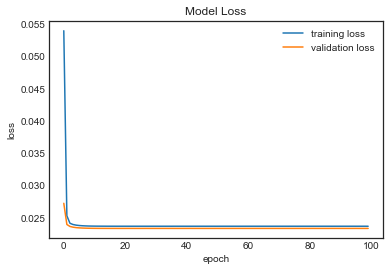

<Figure size 432x288 with 0 Axes>

In [25]:
# plot loss
plt.close('all')
plt.plot(loss,label='training loss')
plt.plot(val_loss, label='validation loss')
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()
plt.savefig('loss_sobelx.jpg')

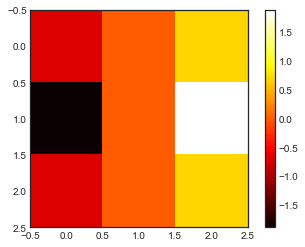

In [28]:
# plot the weights with last epoch
plt.figure()
plt.imshow(weights[-1],cmap='hot')
plt.colorbar()
plt.show()

In [29]:
def visualizeMatrix(matrix,epoch=1):
    fig = plt.figure(figsize=(10,5))
    ax1 = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)
    title = 'Epoch {}'.format(epoch)
    fig.suptitle(title, fontsize=20)
    
    height,width = matrix.shape
    Mud = np.flipud(matrix) # I don't understand this code. Please tell me if you know
    coordinates = [(i,j) for i in range(height) for j in range(width)]
    for coordinate in coordinates:
        i,j = coordinate
        value = np.round(Mud[i,j], decimals=2)
        relcoordinate = (j/float(width), i/float(height))
        ax1.annotate(value,relcoordinate,ha='left',va='center',
                    size=22,alpha=0.7,family='serif')
    padding = 0.25
    wmargin = (width-1)/float(width) + padding
    hmargin = (height-1)/float(height) + padding
    
    hcenter = np.median(range(height))/float(height)
    hcenter = hcenter + 0.015 # offset due to the character alignment
    
    bracket_d = 0.4
    bracket_b = 0.05
    bracket_paddingl = 0.05
    bracket_paddingr = -0.05
    
    ax1.plot([-bracket_paddingl,-bracket_paddingl],[hcenter-bracket_d,hcenter+bracket_d],'k-',lw=2,alpha=0.7)
    ax1.plot([-bracket_paddingl,-bracket_paddingl+bracket_b],[hcenter-bracket_d,hcenter-bracket_d],'k-',lw=2,alpha=0.7)
    ax1.plot([-bracket_paddingl,-bracket_paddingl+bracket_b],[hcenter-bracket_d,hcenter+bracket_d],'k-',lw=2,alpha=0.7)
    
    ax1.plot([wmargin-bracket_paddingr,wmargin-bracket_paddingr],[hcenter-bracket_d,hcenter+bracket_d],'k-',lw=2,alpha=0.7)
    ax1.plot([wmargin-bracket_paddingr-bracket_b,wmargin-bracket_paddingr],[hcenter-bracket_d,hcenter-bracket_d],'k-',lw=2,alpha=0.7)
    ax1.plot([wmargin-bracket_paddingr-bracket_b,wmargin-bracket_paddingr],[hcenter+bracket_d,hcenter+bracket_d],'k-',lw=2,alpha=0.7)
    
    ax1.set_xlim([-padding, wmargin+0.06])
    ax1.set_ylim([-padding,hmargin])
    
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    ax1.axis('off')
    
    matshowplt = ax2.matshow(matrix,cmap='hot',vmin=-2,vmax=2)
    cbar = plt.colorbar(matshowplt, ax=ax2, fraction=0.046,pad=0.04)
    cbar.ax.tick_params(labelsize=18)
    cbar.ax.get_yaxis().labelpad=20
    cbar.ax.set_ylabel('Weight value',rotation=270,fontsize=20)
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.5)
    
    return fig

In [30]:
savefolder = 'images/'
for i in range(len(weights)):
    savepath = savefolder + 'weightfigure' + str(i) + '.jpg'
    matrix = weights[i]
    fig = visualizeMatrix(matrix,epoch=i+1)
    fig.savefig(savepath)
    plt.close()

In [33]:
# transform the static images into a dynamic image

import imageio
from natsort import natsorted

image_dir = 'images/'
imagepaths = [os.path.join(image_dir,filename) for filename in os.listdir(image_dir) if filename.endswith('.jpg')]
imagepaths = natsorted(imagepaths)

with imageio.get_writer('weight.gif',mode='I') as writer:
    for path in imagepaths:
        image = imageio.imread(path)
        writer.append_data(image)

In [42]:
pred_img = model.predict(np.array([gray_img.reshape(256,256,1)])).squeeze()

margin = np.ones(shape=(256,10,3))
combined_image = np.hstack((np.dstack((normalizeImage(pred_img),)*3), margin, np.dstack((normalizeImage(filtered_img),)*3)))

cv2.imwrite('predicted_sobelx.jpg',(255*combined_image).astype(np.uint8))

True